# plain bar chart for the taxonomy prediction result

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("../14_uniref90_tax_substitution/esmatlas_tax_wo_ncbi-count_taxGroup.tsv", delimiter="\t", \
                 names=['count', 'taxGroup'], header=None)

In [2]:
print(df)
print(df['count'].sum())

       count                        taxGroup
0  222471325  species and lower than species
1  165395318                   not predicted
2  137077730    family and lower than family
3   39118279         lower than superkingdom
4   31363159                    superkingdom
5   10350749                            root
605776560


In [3]:
print(df[ df['taxGroup'] != 'not predicted'] ['count'].sum())

440381242


In [4]:
a = """species and lower than species
family and lower than family
lower than superkingdom
superkingdom
root
cellular organism""".split("\n")
print(a)

['species and lower than species', 'family and lower than family', 'lower than superkingdom', 'superkingdom', 'root', 'cellular organism']


In [5]:
custom_order = ['not predicted', 'root', 'cellular organism', 'superkingdom', 'lower than superkingdom', 'family and lower than family', 'species and lower than species',   ]
df = pd.merge( df, pd.DataFrame({'taxGroup': custom_order}), on='taxGroup', how='right').fillna(0)
df['count'] = df['count'].astype(int)

# Convert 'taxGroup' column to a categorical type with the specific order
df['taxGroup'] = pd.Categorical(df['taxGroup'], categories=custom_order[::-1], ordered=True)

# Sort the DataFrame based on the custom order
df = df.sort_values('taxGroup')

In [6]:
df['count'] = df['count'].div(1000000)

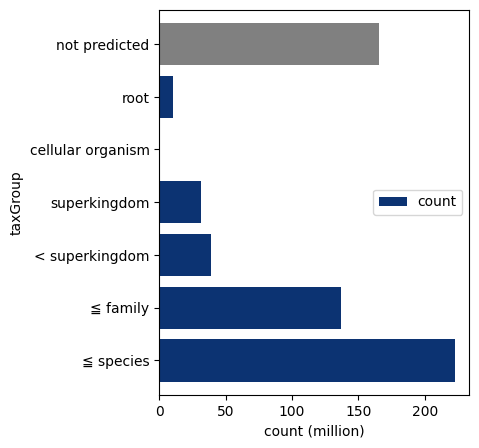

In [7]:

# ax = df.plot.barh(y='count', x='taxGroup', figsize=(4, 3), color=['#0C3372' for _ in range(6)] + ['gray'])
ax = df.plot.barh(y='count', x='taxGroup', figsize=(4, 5), color=['#0C3372' for _ in range(6)] + ['gray'], width=0.8)
ax.set_yticklabels(['not predicted', 'root', 'cellular organism', 'superkingdom', '< superkingdom', '≦ family', '≦ species',   ][::-1],)

plt.xlabel('count (million)')
plt.savefig('tax_plain.svg')